In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict

In [2]:
article = pd.read_csv("articles.csv")
customer = pd.read_csv("customers.csv")
transaction_train = pd.read_csv("transactions_train.csv")

# Transaction Dataset

In [3]:
transaction_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
transaction_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [5]:
transaction_train.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [16]:
transaction_train['t_dat'] = pd.to_datetime(transaction_train['t_dat'])

In [17]:
trans_gr_month = transaction_train.groupby('t_dat').size().rename("no_transactions")
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

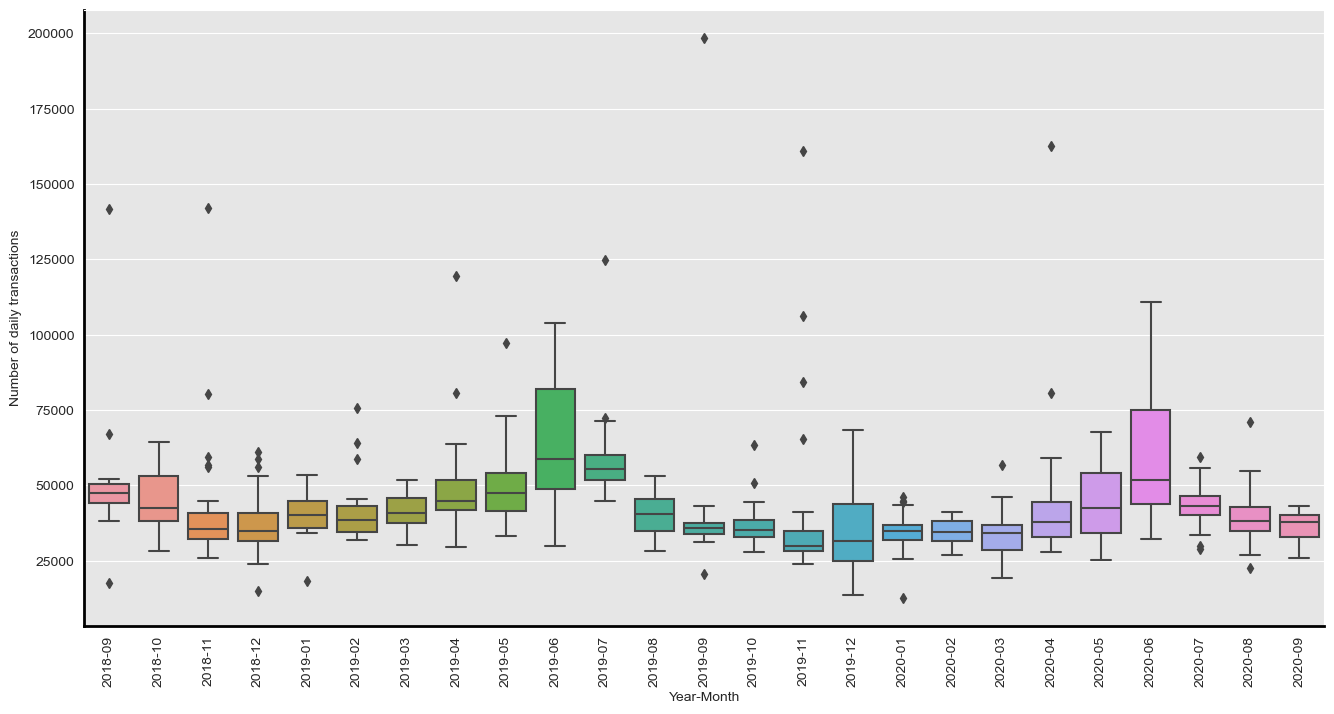

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of daily transactions')
plt.show()

- The boxplot above shows the number of daily transaction in each month. 
- We can observe that number of daily transactions are significantly higher in June 2019 and 2020.

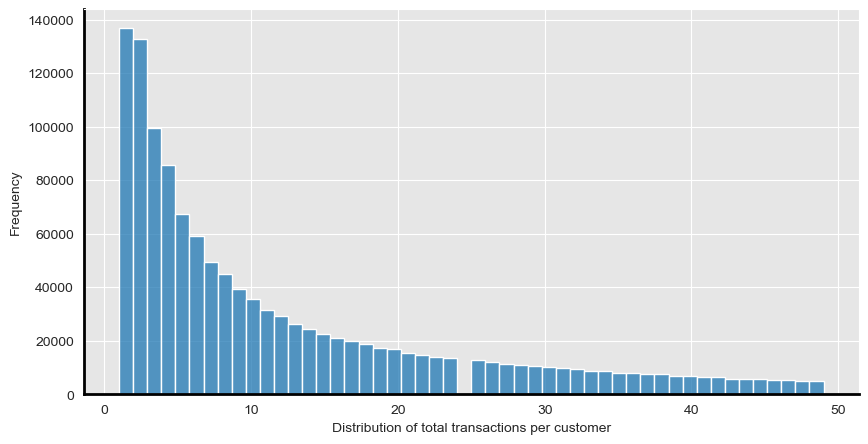

In [75]:
t_by_customer = transaction_train.groupby('customer_id', as_index=False).size()
t_by_customer_50tr = t_by_customer[t_by_customer['size'] < 50]

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer_50tr, x='size', bins=50, stat="frequency")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

The graph above shows us that most of customers, on average, bought only few items during these 2 years.

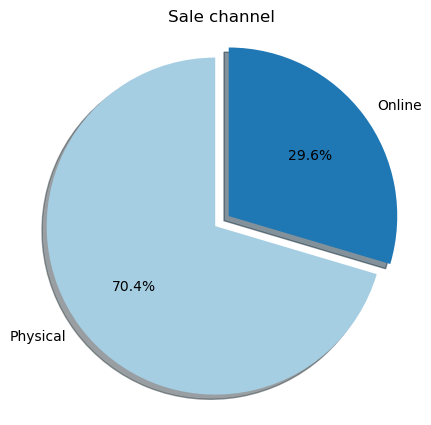

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(transaction_train['sales_channel_id'].value_counts(), explode=explode, labels=['Physical','Online'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Sale channel')
plt.show()

Pie-chart above shows the popularity of different sales channel

In [39]:
transactions_article = pd.merge(left=transaction_train, right=article, how='left',on='article_id')

In [40]:
text = ' '.join(transactions_article['department_name'])

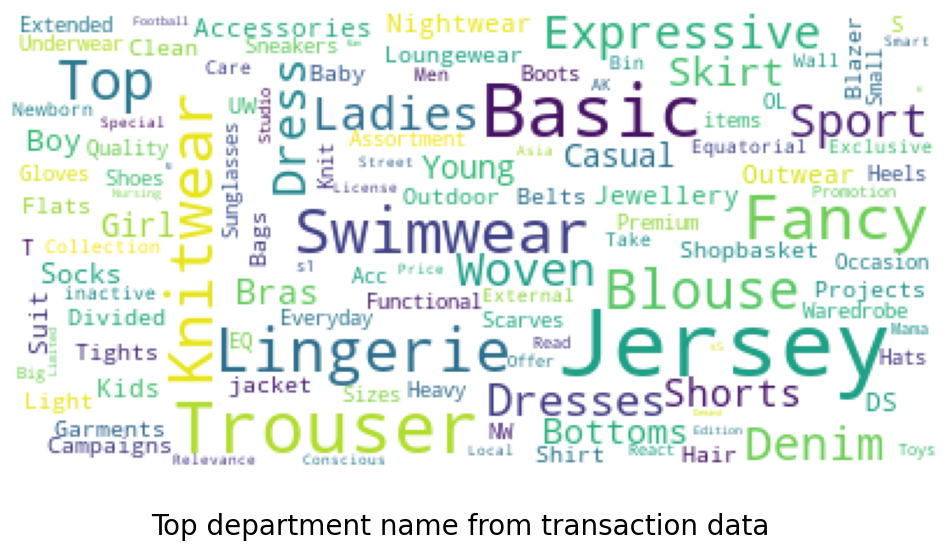

In [41]:
show_wordcloud(text, "Top department name from transaction data")

# Customer Dataset

In [27]:
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [33]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [34]:
customer.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [36]:
customer_backup = customer.copy(deep=True)

In [37]:
customer[['FN','Active']] = customer[['FN','Active']].fillna(0)

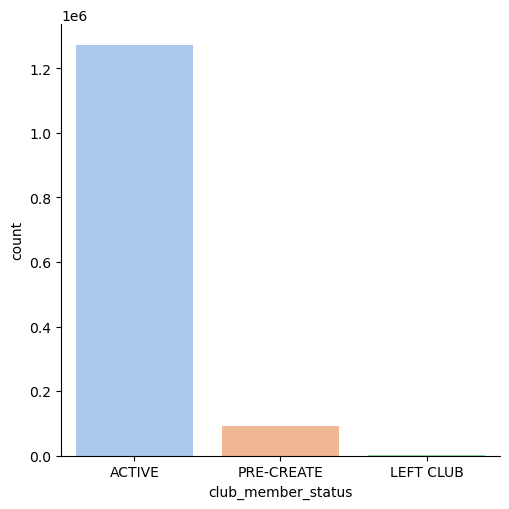

In [36]:
sns.catplot(data=customer, x='club_member_status', kind = 'count', palette = 'pastel')
plt.show()

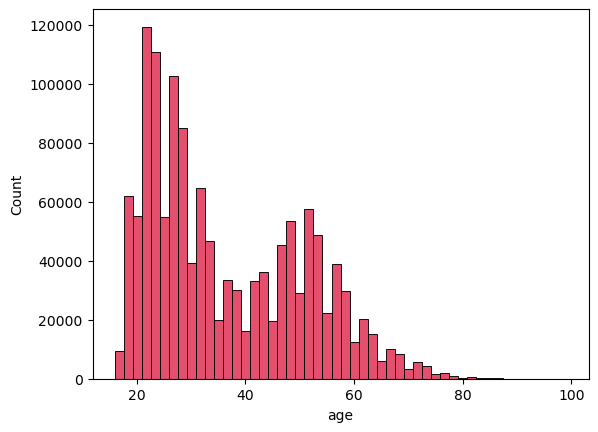

In [37]:
sns.histplot(data=customer, x='age', bins = 50, color = 'crimson')
plt.show()

In [38]:
sizes = pd.DataFrame(customer.age.value_counts())
sizes = sizes.reset_index()
sizes = sizes.rename(columns={'index':'age' , 'age':'count'})
fig = px.bar(sizes, y=sizes['count'], x=sizes['age'], color = sizes['age'])
fig.update_layout(
    title="Age wise Customers",
    xaxis_title="Age",
    yaxis_title="Count"
)
fig.show()

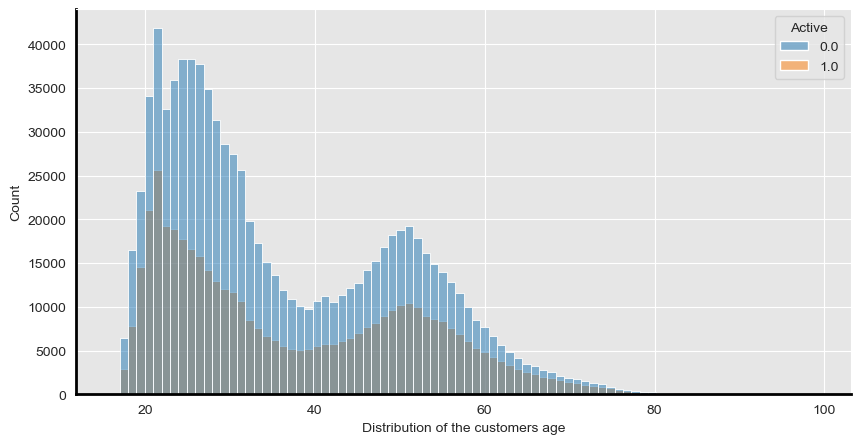

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customer, x='age', bins=customer['age'].nunique(), hue='Active', stat="count")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

Distribution of age of active customers and non-active customer

# Article Dataset

In [3]:
article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
product_group_name_sorted = article.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False)
product_group_name_sorted

product_group_name
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: article_id, dtype: int64

In [23]:
name = article.index_name.unique()
sizes = article.index_name.value_counts()
fig = px.bar(article, y=sizes, x=name, color = name,color_discrete_sequence=px.colors.diverging.Picnic)
fig.update_layout(
    title="Count of Index name",
    xaxis_title="index_name",
    yaxis_title="Count"
)
fig.show()

In [24]:
name = article.product_group_name.unique()
sizes = article.product_group_name.value_counts()
fig = px.bar(article, y=sizes, x=name, color = name,color_discrete_sequence=px.colors.diverging.Picnic)
fig.update_layout(
    title="Count of product_group_name",
    xaxis_title="product_group_name",
    yaxis_title="Count"
)
fig.show()

In [25]:
name = article.product_type_name.unique()
sizes = article.product_type_name.value_counts()
fig = px.bar(article, y=sizes, x=name, color = name,color_discrete_sequence=px.colors.diverging.Picnic)
fig.update_layout(
    title="Count of product_type_name",
    xaxis_title="product_type_name",
    yaxis_title="Count"
)
fig.show()

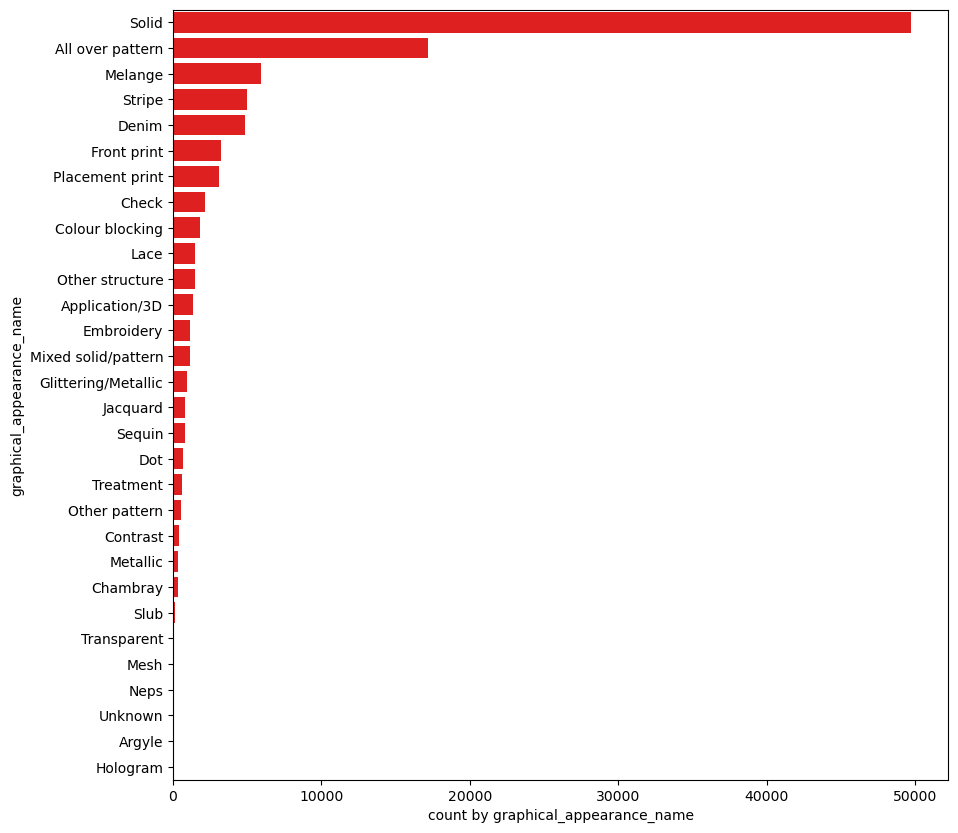

In [9]:
graphical_appearance_name_sorted = article.groupby('graphical_appearance_name').count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x=graphical_appearance_name_sorted.values, y=graphical_appearance_name_sorted.index, color='red')
ax.set_xlabel('count by graphical_appearance_name')
ax.set_ylabel('graphical_appearance_name')
plt.show()

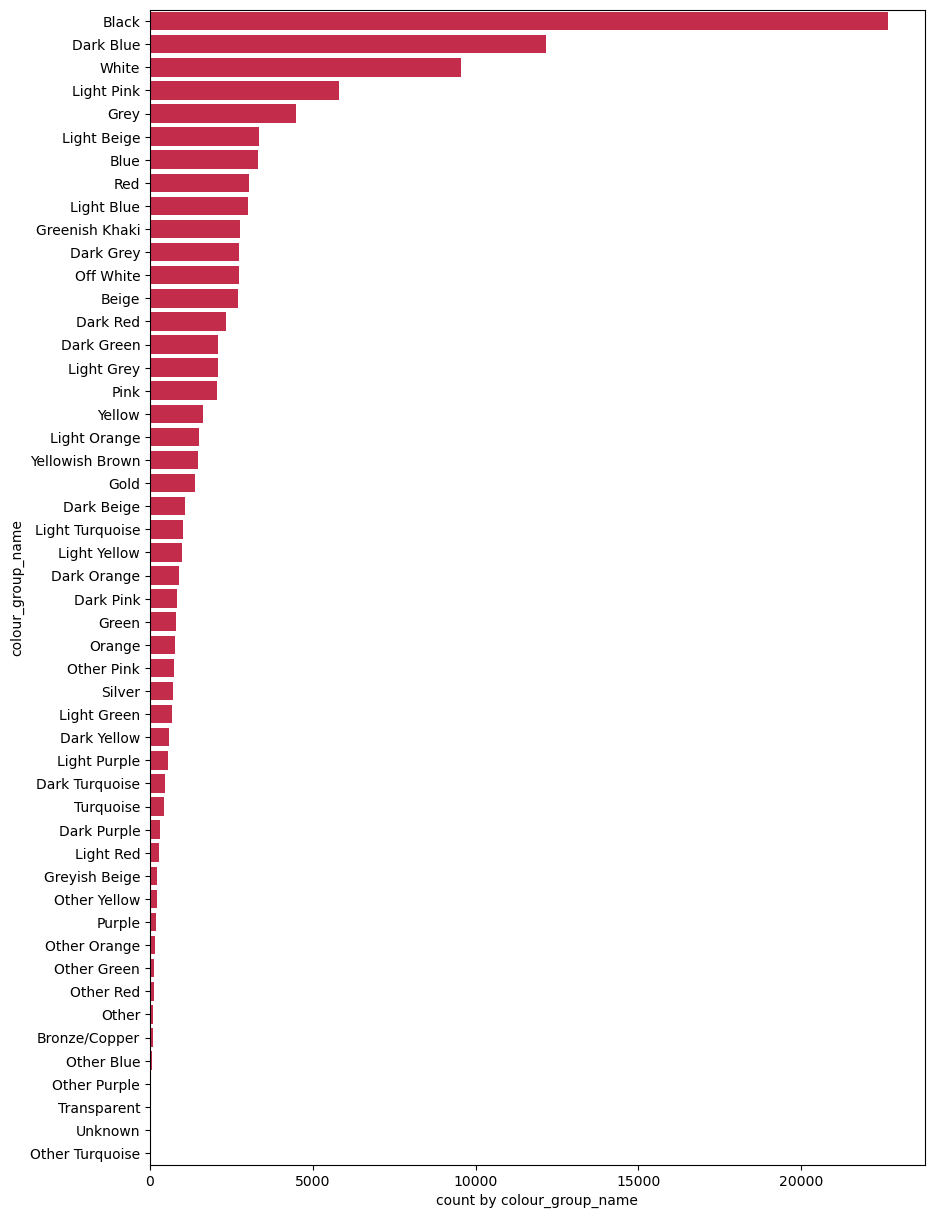

In [8]:
colour_group_name_sorted = article.groupby(['colour_group_name']).count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(x=colour_group_name_sorted.values, y=colour_group_name_sorted.index, color='crimson')
ax.set_xlabel('count by colour_group_name')
ax.set_ylabel('colour_group_name')
plt.show()

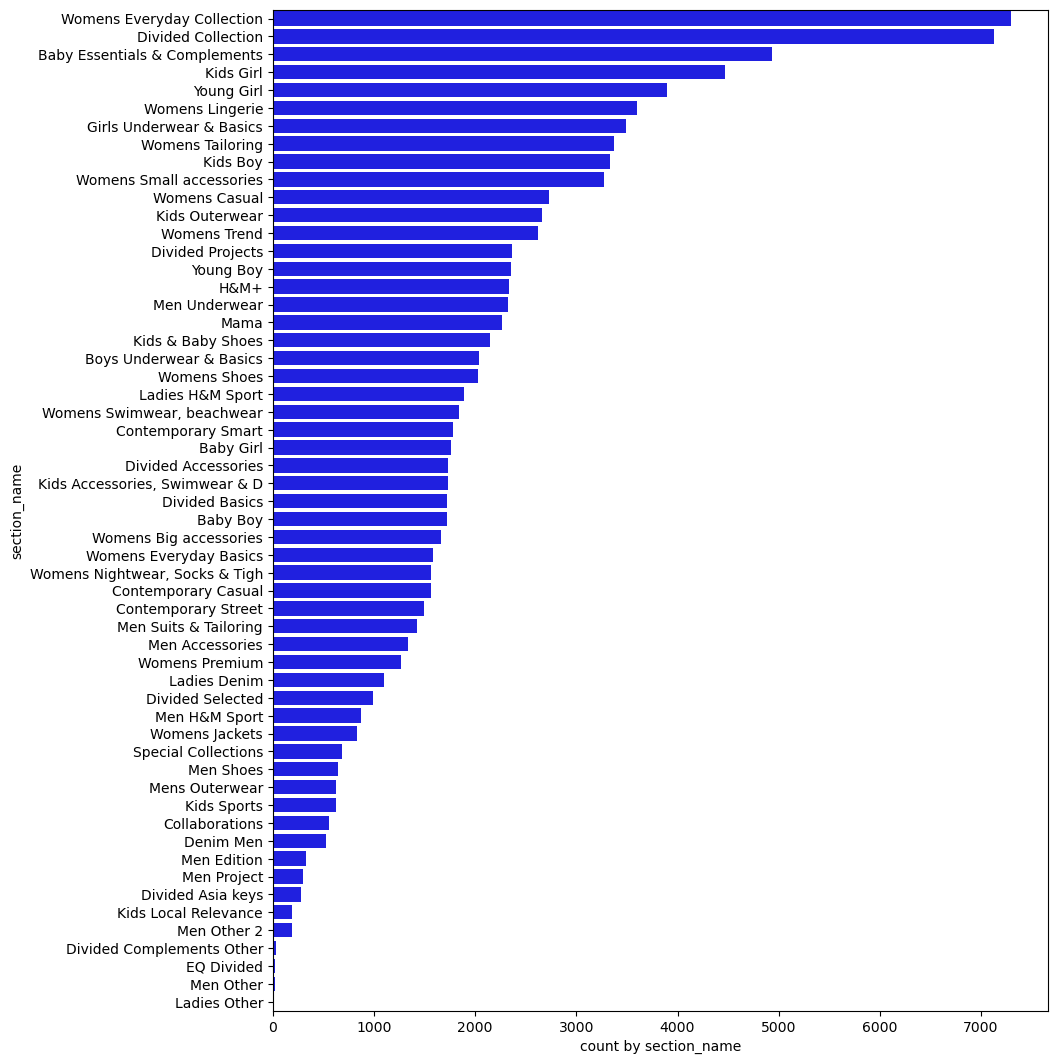

In [11]:
section_name_sorted = article.groupby(['section_name']).count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 13))
ax = sns.barplot(x=section_name_sorted.values, y=section_name_sorted.index, color='blue')
ax.set_xlabel('count by section_name')
ax.set_ylabel('section_name')
plt.show()


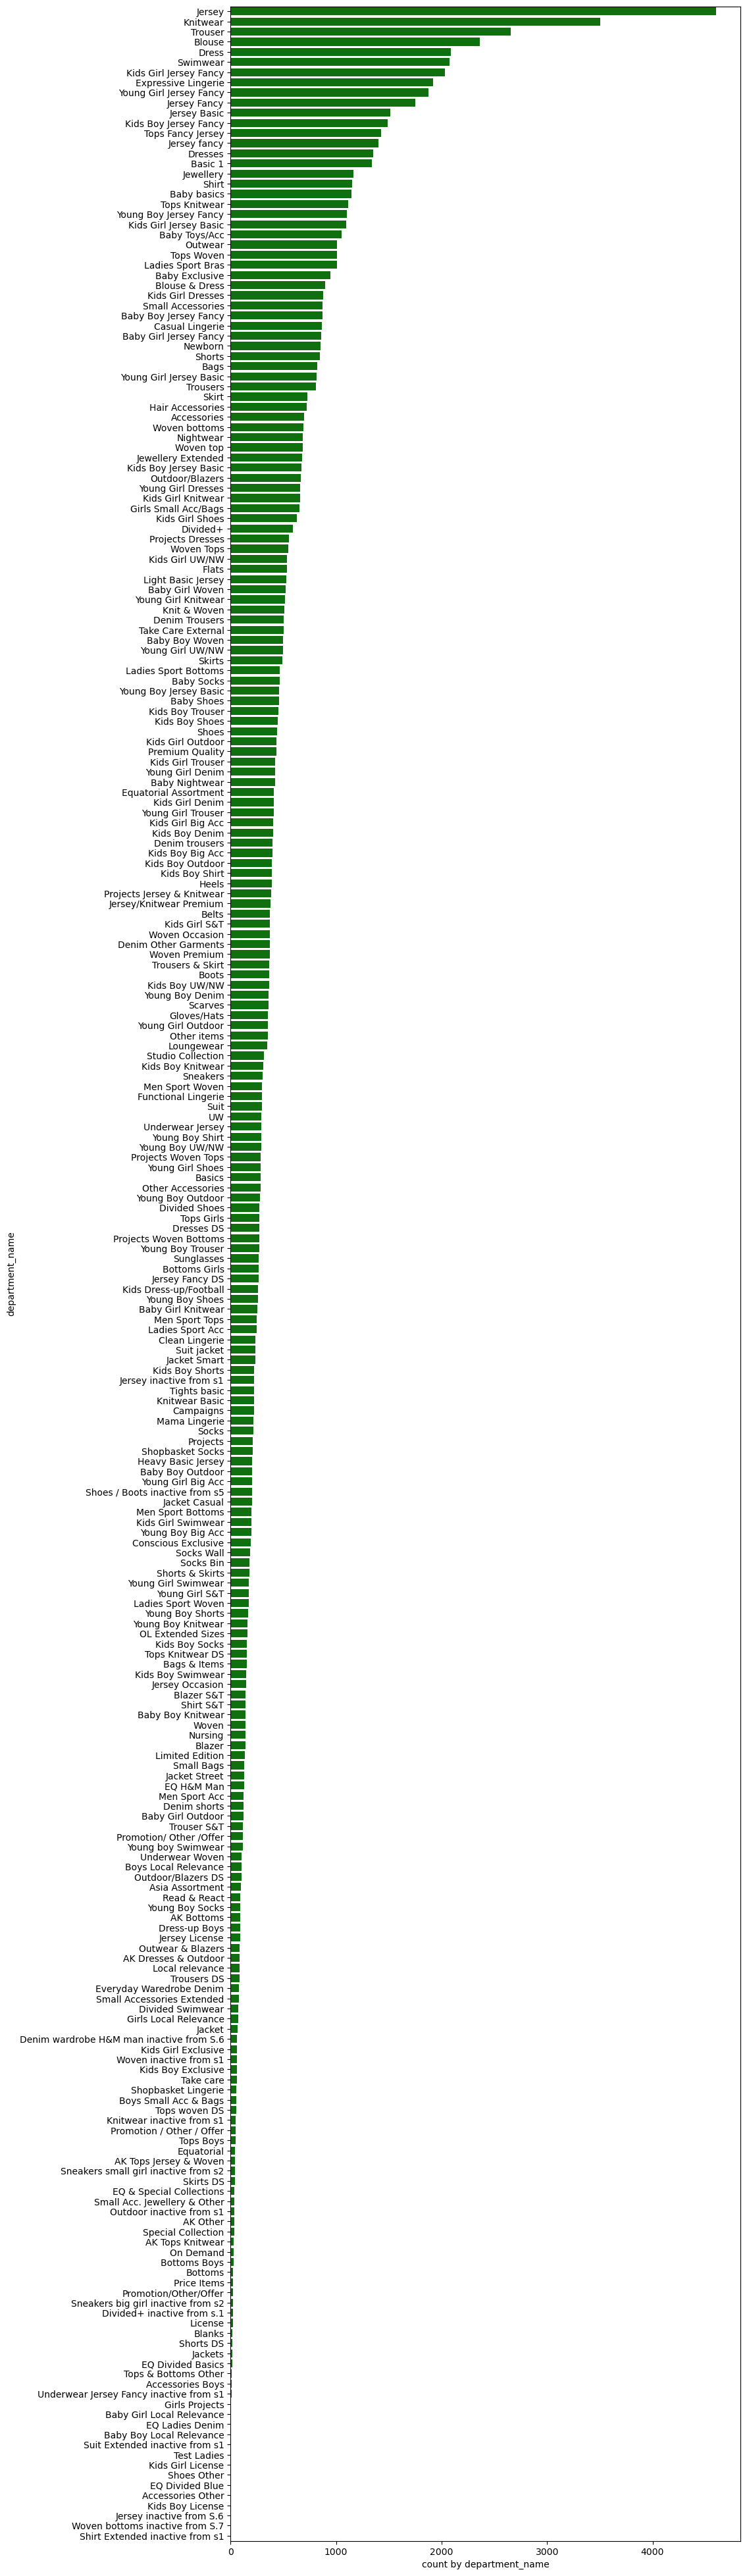

In [12]:
department_name_sorted = article.groupby(['department_name']).count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 50))
ax = sns.barplot(x=department_name_sorted.values, y=department_name_sorted.index, color='green')
ax.set_xlabel('count by department_name')
ax.set_ylabel('department_name')
plt.show()

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
#         stopwords=stopwords,
#         max_words=200,
        max_font_size=40, 
        collocations=False
#         scale=3,
#         random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [15]:
text = ' '.join(article['colour_group_name'])

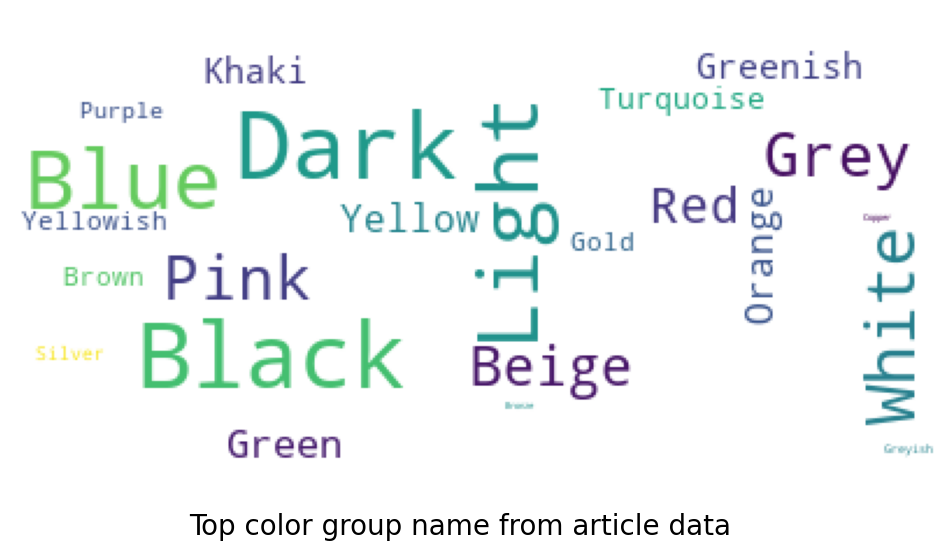

In [16]:
show_wordcloud(text, "Top color group name from article data")

In [ ]:
text = ' '.join(article['department_name'])

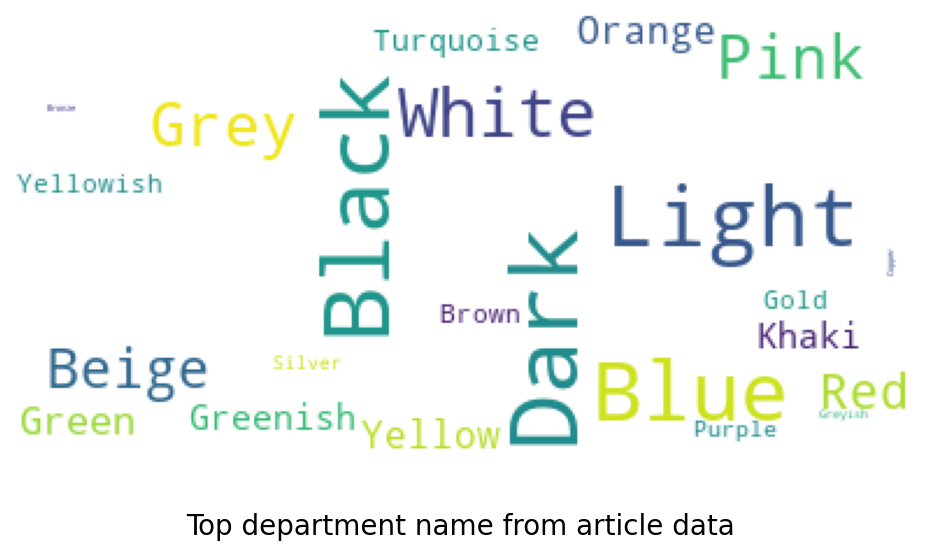

In [17]:
show_wordcloud(text, "Top department name from article data")

In [18]:
text = ' '.join(article['graphical_appearance_name'])

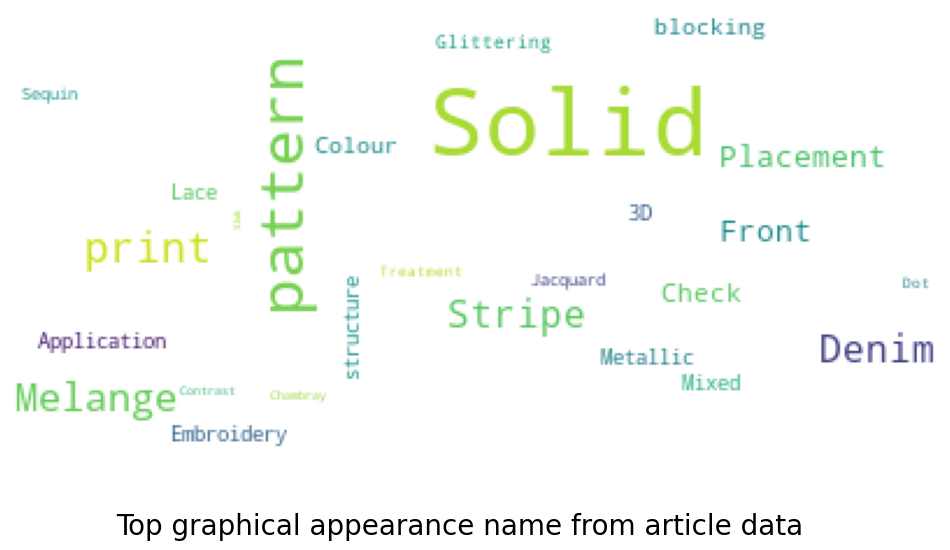

In [19]:
show_wordcloud(text, "Top graphical appearance name from article data")